In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Model evaluation and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load processed data
df = pd.read_csv("/content/processed_train_FD001.csv")

# Quick check
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

Shape: (20631, 13)

Columns:
 Index(['engine_id', 'time_in_cycles', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_15', 'sensor_17',
       'sensor_20', 'sensor_21', 'RUL'],
      dtype='object')


In [3]:
df.head()

,engine_id,time_in_cycles,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,-1.728084,-1.565170,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.603816,-0.781710,1.348493,1.194427,191
1,-1.728084,-1.550652,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.275852,-0.781710,1.016528,1.236922,190
2,-1.728084,-1.536134,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-0.649144,-2.073094,0.739891,0.503423,189
3,-1.728084,-1.521616,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.971665,-0.781710,0.352598,0.777792,188
4,-1.728084,-1.507098,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.339845,-0.136018,0.463253,1.059552,187


In [4]:
from sklearn.model_selection import train_test_split

# Get all unique engines
engines = df['engine_id'].unique()

# Split engine IDs into train and test groups
train_engines, test_engines = train_test_split(engines, test_size=0.2, random_state=42)

# Create corresponding train and test sets
train_df = df[df['engine_id'].isin(train_engines)]
test_df = df[df['engine_id'].isin(test_engines)]

# Define features and target
X_train = train_df.iloc[:, 1:-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, 1:-1]
y_test = test_df.iloc[:, -1]


In [5]:
# Initializing the models

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0
    ),
}

print(f"Initialized {len(models)} regression models.")


Initialized 7 regression models.


In [6]:
# Training / Evaluating Models

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE", ascending=True)
results_df


,Model,MAE,RMSE,R²
5,Gradient Boosting,23.327348,30.399122,0.785599
6,XGBoost,23.693428,31.025587,0.776671
0,Linear Regression,25.349751,31.878182,0.764228
2,Lasso Regression,25.349811,31.878260,0.764227
1,Ridge Regression,25.349855,31.878423,0.764224
4,Random Forest,24.386885,31.904984,0.763831
3,Decision Tree,26.850682,35.911779,0.700788


/tmp/ipython-input-2974802442.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="RMSE", y="Model", palette="mako")


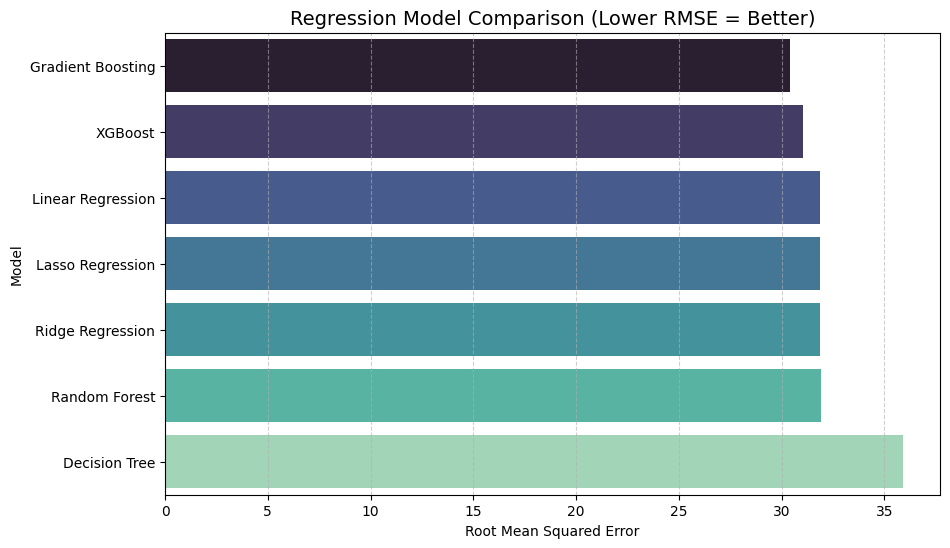

In [7]:
# Model comparision

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="RMSE", y="Model", palette="mako")
plt.title("Regression Model Comparison (Lower RMSE = Better)", fontsize=14)
plt.xlabel("Root Mean Squared Error")
plt.ylabel("Model")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()


      Engine_ID     Cycle  Actual_RUL  Predicted_RUL
698   -1.385933  1.875630           2            7.0
3524   1.009119 -0.171428         143          108.0
239   -1.591223 -0.882817         221          185.0
2985   0.769613  0.002789          57           80.0
2630   0.085313  1.599785          38           44.0
2534   0.085313  0.206044         134          136.0
964   -1.112213 -0.113356          57           70.0
94    -1.728084 -0.200465          97          142.0
2776   0.666968 -0.011729         100           98.0
1098  -0.975353 -0.461791          91          122.0


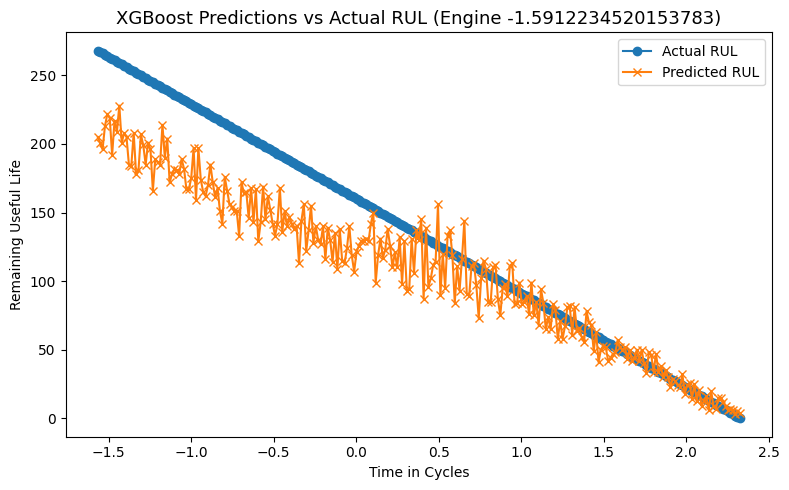

In [8]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Initialize and train the model
best_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)
best_model.fit(X_train, y_train)

# Predict RUL on test data
y_pred = best_model.predict(X_test)

# Combine into a comparison DataFrame
comparison_df = pd.DataFrame({
    "Engine_ID": test_df["engine_id"].values,
    "Cycle": test_df["time_in_cycles"].values,
    "Actual_RUL": y_test.values,
    "Predicted_RUL": y_pred.round(0)
})

# Display a few random samples
print(comparison_df.sample(10))

# Visualize one engine’s actual vs predicted RUL
engine_id = test_df["engine_id"].unique()[1]
engine_sample = comparison_df[comparison_df["Engine_ID"] == engine_id]

plt.figure(figsize=(8, 5))
plt.plot(engine_sample["Cycle"], engine_sample["Actual_RUL"], label="Actual RUL", marker='o')
plt.plot(engine_sample["Cycle"], engine_sample["Predicted_RUL"], label="Predicted RUL", marker='x')
plt.title(f"XGBoost Predictions vs Actual RUL (Engine {engine_id})", fontsize=13)
plt.xlabel("Time in Cycles")
plt.ylabel("Remaining Useful Life")
plt.legend()
plt.tight_layout()
plt.show()


# Model Interpretability using SHAP

In [9]:
!pip install shap

In [10]:
import shap
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# 1. Re-initialize and retrain the Random Forest model
# Note: Retraining the model ensures SHAP uses the correct, clean model object.
rf_for_shap = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_for_shap.fit(X_train, y_train)

# 2. Use the dedicated TreeExplainer for Random Forest (much faster and more robust)
print("Initializing SHAP TreeExplainer for Random Forest...")
explainer_rf = shap.TreeExplainer(rf_for_shap)

# 3. Calculate SHAP values for the full X_test (TreeExplainer is fast enough)
print("Calculating SHAP values (should be quick)...")
shap_values_rf = explainer_rf.shap_values(X_test)

print("\nSHAP values calculated successfully using TreeExplainer.")

# 4. Determine the base value safely
base_value = explainer_rf.expected_value
# Fix: Check if base_value is an array/list, and if so, extract the single element.
if isinstance(base_value, (list, np.ndarray)) and len(base_value) == 1:
    safe_base_value = base_value[0]
else:
    safe_base_value = base_value

Initializing SHAP TreeExplainer for Random Forest...
Calculating SHAP values (should be quick)...

SHAP values calculated successfully using TreeExplainer.


Explaining prediction for instance index: 400
Base Value (Average Prediction): 108.40
Actual Prediction: 67.63


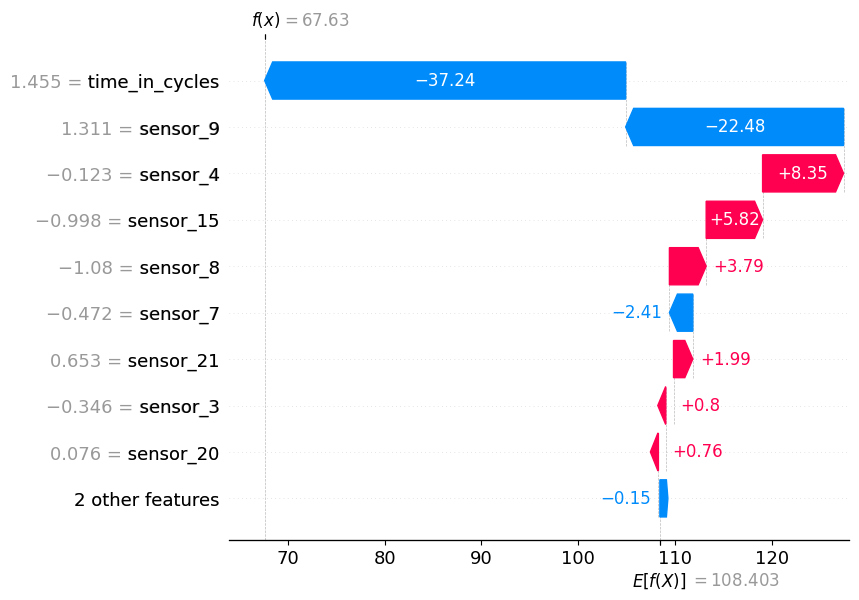

In [11]:
# Select the instance to explain (e.g., the first test instance)
instance_index = 400
single_instance_features = X_test.iloc[instance_index]
single_instance_shap_values = shap_values_rf[instance_index]

# Get the feature names for better plotting
feature_names = X_test.columns.tolist()

print(f"Explaining prediction for instance index: {instance_index}")
print(f"Base Value (Average Prediction): {safe_base_value:.2f}")
print(f"Actual Prediction: {rf_for_shap.predict(single_instance_features.to_frame().T)[0]:.2f}")
# We'll skip printing the Actual RUL since X_test indices are complicated by the train/test split.

# Create the waterfall plot
shap.waterfall_plot(
    shap.Explanation(
        values=single_instance_shap_values,
        base_values=safe_base_value, # Use the safely extracted value
        data=single_instance_features.values,
        feature_names=feature_names
    ),
    max_display=10,
    show=True
)